In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
# Load datasets with 'latin1' encoding
players_df = pd.read_csv('players.csv', encoding='latin1')
teams_df = pd.read_csv('teams.csv', encoding='latin1')
ranking_df = pd.read_csv('AllTimeRankingByClub.csv', encoding='latin1')
df_historical_uefa = pd.read_csv("historical_uefa_data.csv")

In [3]:
# Merge datasets on appropriate columns
team_data = pd.merge(players_df,teams_df, left_on='team', right_on='Squad', how='left')
team_data = pd.merge(team_data, df_historical_uefa, left_on='team_county', right_on='Country', how='left')

In [4]:
# Select features and target variable
X = team_data[['avg_age', 'possession', 'goals_x', 'assists_x', 'goals_assists_x',
               'Semifinal Appearances', 'Final Appearances']]
y = team_data['Tournament Outcomes']

In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Function to train and evaluate models (replace with additional models as desired)
def train_and_evaluate_model(model_name, model):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"{model_name} Accuracy: {accuracy:.4f}")
  print(classification_report(y_test, y_pred))
  return model

D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


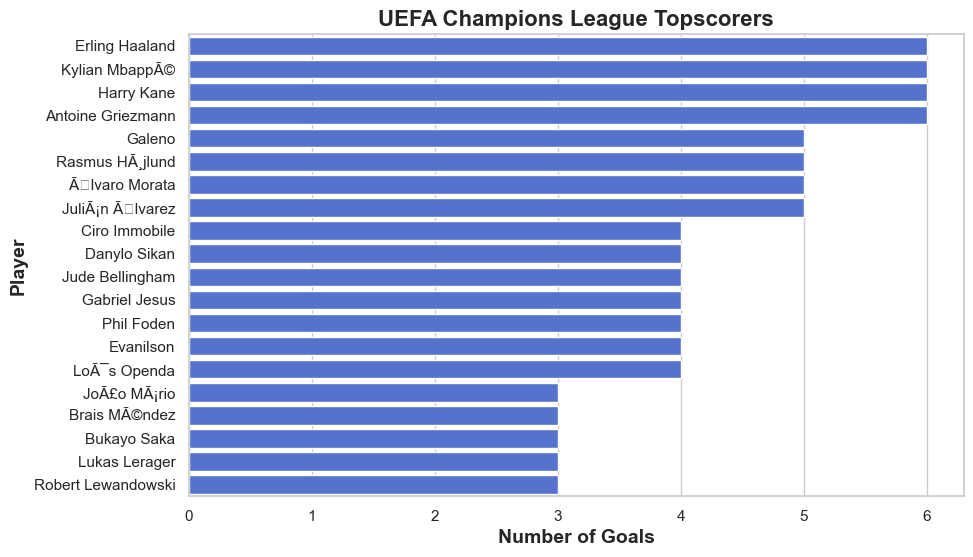

In [7]:
# Sort the players by goals and select the top 20 players
top_players = players_df.sort_values('goals', ascending=False).head(20)

# Set the style and context for the plot
sns.set_style('whitegrid')
sns.set_context('notebook')

# Set the royal blue color
royal_blue = '#4169E1'

# Create the bar plot with royal blue color
plt.figure(figsize=(10, 6))
sns.barplot(x=top_players['goals'], y=top_players['player'], color=royal_blue)

# Add labels and title
plt.xlabel('Number of Goals', fontsize=14, fontweight='bold')
plt.ylabel('Player', fontsize=14, fontweight='bold')
plt.title('UEFA Champions League Topscorers', fontsize=16, fontweight='bold')

# Show plot
plt.show()

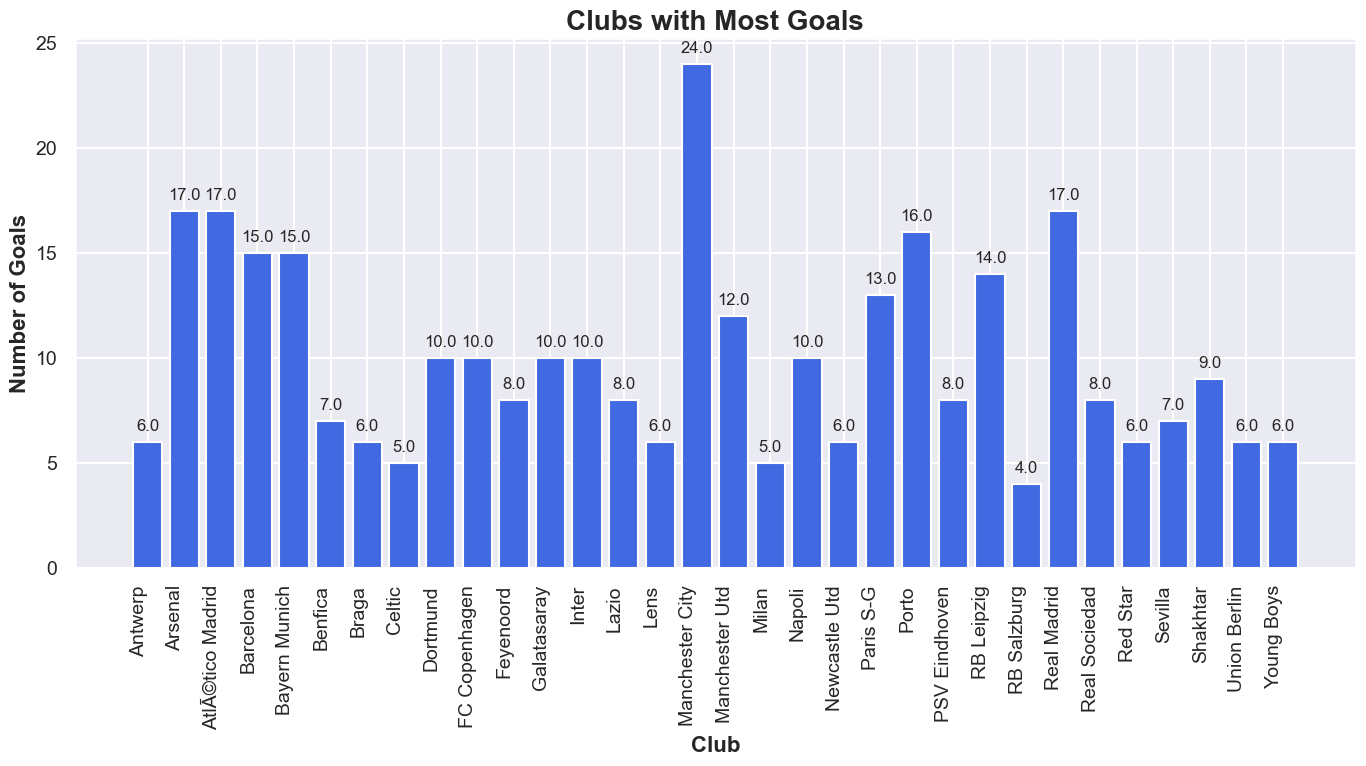

In [8]:
# Set the style and context for the plot
plt.figure(figsize=(14, 8))
sns.set_style('darkgrid')
sns.set_context('talk')

# Create the bar plot with royal blue color
plt.bar(teams_df['Squad'], teams_df['goals'], color=royal_blue)

# Add annotations
for i in range(len(teams_df['Squad'])):
    plt.text(i, teams_df['goals'][i] + 0.5, teams_df['goals'][i], ha='center', fontsize=12)

# Add labels and title
plt.title('Clubs with Most Goals', fontsize=20, fontweight='bold')
plt.xlabel('Club', fontsize=16, fontweight='bold')
plt.ylabel('Number of Goals', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Show plot
plt.tight_layout()
plt.show()


In [9]:
# Calculate a performance score based on goals, assists, and other relevant factors
teams_df['performance_score'] = teams_df['goals'] + teams_df['assists'] + teams_df['possession'] * 0.5

# Find the team with the maximum number of players used
most_players_team = teams_df.loc[teams_df['players_used'].idxmax()]

# Find the team with the highest performance score
best_performance_team = teams_df.loc[teams_df['performance_score'].idxmax()]


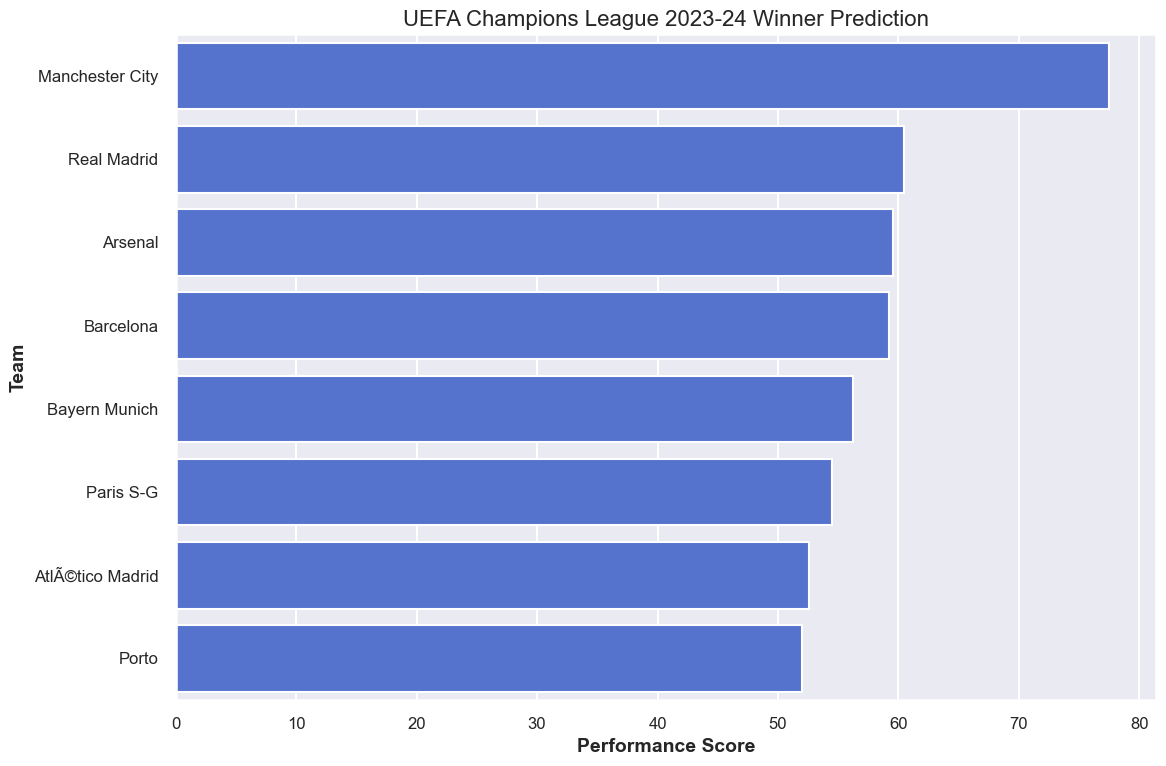

In [10]:
# Set the style and context for the plot
plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')
sns.set_context('talk')

# Sort teams based on performance score and then players used
sorted_teams = teams_df.sort_values(by=['performance_score', 'players_used'], ascending=[False, False])

# Select the top 8 teams
top_8_teams = sorted_teams.head(8)

# Plotting
sns.barplot(x='performance_score', y='Squad', data=top_8_teams, color='royalblue')
plt.title('UEFA Champions League 2023-24 Winner Prediction', fontsize=16)
plt.xlabel('Performance Score', fontsize=14, fontweight='bold')
plt.ylabel('Team', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


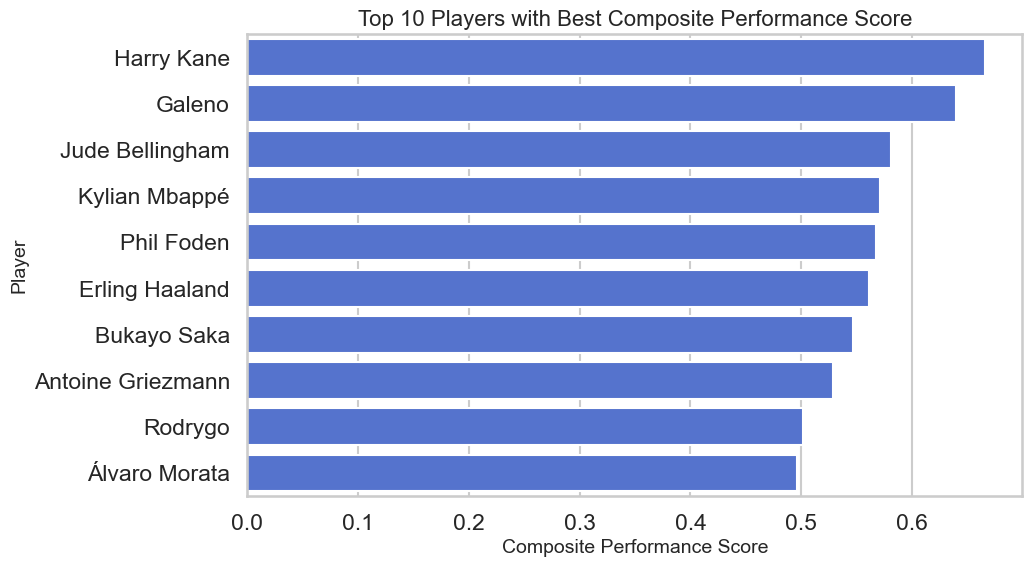

In [15]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset containing player statistics
players_df = pd.read_csv('players.csv')

# Define weighting factors for each performance metric
weighting_factors = {
    'games': 0.05,
    'games_starts': 0.05,
    'minutes': 0.1,
    'minutes_90s': 0.1,
    'goals': 0.2,
    'assists': 0.15,
    'goals_per90': 0.1,
    'assists_per90': 0.05,
    'goals_assists_per90': 0.1,
    'goals_pens_per90': 0.05,
    'goals_assists_pens_per90': 0.05,
    'xg_per90': 0.05,
    'xg_assist_per90': 0.05,
    'xg_xg_assist_per90': 0.05,
    'npxg_per90': 0.05,
    'npxg_xg_assist_per90': 0.05,
    # Add other performance metrics and their weighting factors here
}

# Normalize data
min_max_scaler = MinMaxScaler()
performance_metrics = ['games', 'games_starts', 'minutes', 'minutes_90s', 'goals', 'assists', 'goals_per90', 'assists_per90',
                       'goals_assists_per90', 'goals_pens_per90', 'goals_assists_pens_per90', 'xg_per90', 'xg_assist_per90',
                       'xg_xg_assist_per90', 'npxg_per90', 'npxg_xg_assist_per90']
normalized_data = min_max_scaler.fit_transform(players_df[performance_metrics])

# Create a new DataFrame with normalized data
normalized_df = pd.DataFrame(normalized_data, columns=[f'normalized_{metric}' for metric in performance_metrics])

# Calculate composite performance score
players_df['composite_performance_score'] = 0
for metric, weight in weighting_factors.items():
    players_df['composite_performance_score'] += normalized_df[f'normalized_{metric}'] * weight

# Rank players based on composite performance score
players_df = players_df.sort_values(by='composite_performance_score', ascending=False)

# Set seaborn style
sns.set_style("whitegrid")

# Set the royal blue color
royal_blue = (65/255, 105/255, 225/255)  # RGB values for royal blue

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x="composite_performance_score", y="player", data=players_df.head(10), color=royal_blue)
plt.title('Top 10 Players with Best Composite Performance Score', fontsize=16)
plt.xlabel('Composite Performance Score', fontsize=14)
plt.ylabel('Player', fontsize=14)
plt.show()